<a href="https://colab.research.google.com/github/s-jainr/deep-learning-sp23/blob/main/Rahul_AIT_09_Author_classification_assessment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Copyright

<PRE>
Copyright (c) 2023 Bálint Gyires-Tóth - All Rights Reserved
You may use and modify this code for research and development purpuses.
Use this code for educational purposes (self-paced or instructor led) without the permission of the author is prohibited.
</PRE>

# Author classification
The task is to train a 1D CNN or an LSTM that is able to  classify text from two authors. The final model should be able to tell about a text with a given length (e.g. 60 characters) who wrote it. 

Please write the codes according to the following parts:

## Python module imports
Import all Python modules that you would need during the Assignment.

In [50]:
from sklearn.model_selection import train_test_split
from urllib.request import urlretrieve
import numpy as np
import seaborn as sns
import pandas as pd

## Data acquisition
Seek a possible dataset, you can use any source, e.g.
* http://www.gutenberg.org/
* https://www.kaggle.com/datasets
* https://paperswithcode.com/datasets
* if you would like to learn Hungarian, than e.g. https://mek.oszk.hu/

You can download the text by hand (e.g. by copy-pasting some parts into txt files) or with Python. 

In [51]:
shakespeare = 'https://www.gutenberg.org/cache/epub/1513/pg1513.txt'
fitzgerald = 'https://www.gutenberg.org/cache/epub/64317/pg64317.txt'

urlretrieve(shakespeare, 'shakespeare.txt')
shakespeare = open("shakespeare.txt", encoding='utf-8').read().lower()

urlretrieve(fitzgerald, 'fitzgerald.txt')
fitzgerald = open("fitzgerald.txt", encoding='utf-8').read().lower()

## Data analysis
Count the number of characters from both authors and display them on a plot (e.g. Seaborn's countplot).

<Axes: ylabel='count'>

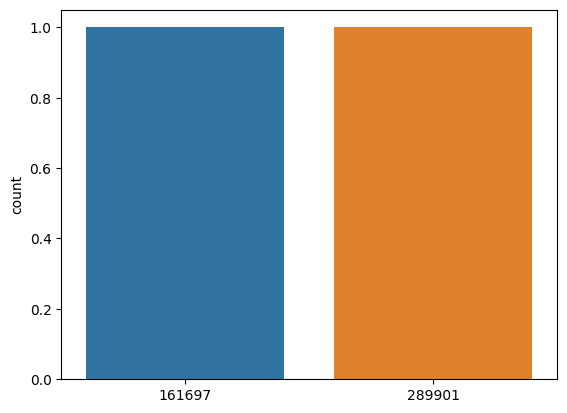

In [52]:
# sns.set_theme(style="whitegrid")
sns.countplot(x=[len(shakespeare), len(fitzgerald)], )

## Data loading, labeling and preprocessing
Load the data and convert the characters into one-hot encodings. Then load the data into a 3D NumPy array, with a shape of

* (batch, sequence_length, alphabet_length)

where sequence_length=60, and alphabet_length equals to the number of unique characters in both datasets. The sequences should be cut out from the complete dataset by sliding window. You should add 0 and 1 labels to the sequences, according to the author. 

Later you may change sequence_length to achieve better results!

In [53]:
chars = sorted(list(set(shakespeare+fitzgerald)))

print("Unique characters of the books:", len(chars))
# print(chars)

char_indices = dict((c, i) for i, c in enumerate(chars))
indices_char = dict((i, c) for i, c in enumerate(chars))

# print("Indices to char dictionary:", indices_char)
char_indices

Unique characters of the books: 72


{'\t': 0,
 '\n': 1,
 ' ': 2,
 '!': 3,
 '"': 4,
 '#': 5,
 '$': 6,
 '%': 7,
 '&': 8,
 "'": 9,
 '(': 10,
 ')': 11,
 '*': 12,
 ',': 13,
 '-': 14,
 '.': 15,
 '/': 16,
 '0': 17,
 '1': 18,
 '2': 19,
 '3': 20,
 '4': 21,
 '5': 22,
 '6': 23,
 '7': 24,
 '8': 25,
 '9': 26,
 ':': 27,
 ';': 28,
 '?': 29,
 '[': 30,
 ']': 31,
 '_': 32,
 'a': 33,
 'b': 34,
 'c': 35,
 'd': 36,
 'e': 37,
 'f': 38,
 'g': 39,
 'h': 40,
 'i': 41,
 'j': 42,
 'k': 43,
 'l': 44,
 'm': 45,
 'n': 46,
 'o': 47,
 'p': 48,
 'q': 49,
 'r': 50,
 's': 51,
 't': 52,
 'u': 53,
 'v': 54,
 'w': 55,
 'x': 56,
 'y': 57,
 'z': 58,
 'æ': 59,
 'ç': 60,
 'é': 61,
 'ê': 62,
 'ô': 63,
 '\u200a': 64,
 '—': 65,
 '‘': 66,
 '’': 67,
 '“': 68,
 '”': 69,
 '…': 70,
 '\ufeff': 71}

In [54]:
maxlen  = 60
step    = 10   # the step size between two "sentence" is 10 characters
sentences_s = []
sentences_f = []

for i in range(0, len(shakespeare)-maxlen, step):
    sentences_s.append(shakespeare[i:i+maxlen])

for i in range(0, len(fitzgerald)-maxlen, step):
    sentences_f.append(fitzgerald[i:i+maxlen])

sentences = sentences_s + sentences_f

sentences_s[:10]

['\ufeffthe project gutenberg ebook of romeo and juliet, by william',
 'ct gutenberg ebook of romeo and juliet, by william shakespea',
 'rg ebook of romeo and juliet, by william shakespeare\n\nthis e',
 'f romeo and juliet, by william shakespeare\n\nthis ebook is fo',
 'd juliet, by william shakespeare\n\nthis ebook is for the use ',
 'by william shakespeare\n\nthis ebook is for the use of anyone ',
 ' shakespeare\n\nthis ebook is for the use of anyone anywhere i',
 're\n\nthis ebook is for the use of anyone anywhere in the unit',
 'book is for the use of anyone anywhere in the united states ',
 'r the use of anyone anywhere in the united states and\nmost o']

In [55]:
X_s = np.zeros((len(sentences_s), maxlen, len(chars)))
X_f = np.zeros((len(sentences_f), maxlen, len(chars)))

for i, sentence in enumerate(sentences_s):
    for t, char in enumerate(sentence): 
        # print(sum(X_s[i, t, :]))
        X_s[i,t,char_indices[char]] = 1
        # print(i, t, char_indices[char])
        # print(sum(X_s[i, t, :]))
    # break

for i, sentence in enumerate(sentences_f):
    for t, char in enumerate(sentence): 
        X_f[i,t,char_indices[char]] = 1


y_s = np.ones(len(sentences_s))
y_f = np.zeros(len(sentences_f))

print("Shape of the input data:", X_s.shape, X_f.shape)
print("Shape of the target data:", y_s.shape, y_f.shape)

Shape of the input data: (16164, 60, 72) (28985, 60, 72)
Shape of the target data: (16164,) (28985,)


In [56]:
sentences_s[0], sentences_f[0]

('\ufeffthe project gutenberg ebook of romeo and juliet, by william',
 '\ufeffthe project gutenberg ebook of the great gatsby, by f. scot')

## Data splitting
Split the data into train, validate and test sets. Make 

In [57]:
X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(X_s, y_s, test_size=0.2, random_state=47)
X_train_f, X_test_f, y_train_f, y_test_f = train_test_split(X_f, y_f, test_size=0.2, random_state=47)

In [58]:
X_train_s, X_val_s, y_train_s, y_val_s = train_test_split(X_train_s, y_train_s, test_size=0.2, random_state=47)
X_train_f, X_val_f, y_train_f, y_val_f = train_test_split(X_train_f, y_train_f, test_size=0.2, random_state=47)

In [59]:
X_train = np.append(X_train_s, X_train_f, axis=0)
X_test = np.append(X_test_s, X_test_f, axis=0)
X_val = np.append(X_val_s, X_val_f, axis=0)

y_train = np.append(y_train_s, y_train_f, axis=0)
y_test = np.append(y_test_s, y_test_f, axis=0)
y_val = np.append(y_val_s, y_val_f, axis=0)

## Model definition
Define a 1D CNN or an LSTM for the task. Compile the model with the correct loss function.

In [60]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.layers import LSTM
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import RMSprop


In [61]:
# model = Sequential()
# model.add(LSTM(128, input_shape=(X_train.shape[-2], X_train.shape[-1])))
# model.add(Dense(1, activation='sigmoid'))

In [62]:
model = Sequential()
model.add(LSTM(128, input_shape=(X_train.shape[-2], X_train.shape[-1])))
model.add(Dense(len(chars)))
model.add(Activation('softmax'))
model.add(Dense(1, activation="sigmoid"))

optimizer = RMSprop(learning_rate=0.01)
model.compile(loss='binary_crossentropy', optimizer=optimizer)

In [63]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 128)               102912    
                                                                 
 dense (Dense)               (None, 72)                9288      
                                                                 
 activation (Activation)     (None, 72)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 73        
                                                                 
Total params: 112,273
Trainable params: 112,273
Non-trainable params: 0
_________________________________________________________________


In [64]:
# model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

## Model training
Train the model and apply early stopping.

In [65]:
es = EarlyStopping(patience=5)

In [66]:
network_history = model.fit(X_train, y_train, 
                            validation_data=(X_val,y_val),
                            batch_size=128,                             
                            epochs=1000, 
                            verbose=1, 
                            callbacks=[es])

Epoch 1/1000
226/226 [==============================] - 53s 223ms/step - loss: 0.6535 - val_loss: 0.6532
Epoch 2/1000
226/226 [==============================] - 49s 219ms/step - loss: 0.6525 - val_loss: 0.6522
Epoch 3/1000
226/226 [==============================] - 47s 208ms/step - loss: 0.6521 - val_loss: 0.6510
Epoch 4/1000
226/226 [==============================] - 49s 218ms/step - loss: 0.6505 - val_loss: 0.6466
Epoch 5/1000
226/226 [==============================] - 48s 213ms/step - loss: 0.6495 - val_loss: 0.6501
Epoch 6/1000
226/226 [==============================] - 47s 206ms/step - loss: 0.6480 - val_loss: 0.6520
Epoch 7/1000
226/226 [==============================] - 48s 212ms/step - loss: 0.6499 - val_loss: 0.6485
Epoch 8/1000
226/226 [==============================] - 49s 216ms/step - loss: 0.6433 - val_loss: 0.6358
Epoch 9/1000
226/226 [==============================] - 47s 208ms/step - loss: 0.6204 - val_loss: 0.5788
Epoch 10/1000
226/226 [==============================] 

## Evaluation on test data
Evaluate the model on the test data in terms of loss and accuracy.

In [67]:
model.evaluate(X_test, y_test)

283/283 [==============================] - 11s 38ms/step - loss: 0.6525


0.6524667143821716

## Confusion matrix
Calculate and display the confusion matrix.

In [68]:
from sklearn.metrics import confusion_matrix, classification_report

In [69]:
preds = model.predict(X_test)

283/283 [==============================] - 12s 39ms/step


In [72]:
preds = np.round(preds)

max(preds), min(preds)

(array([0.], dtype=float32), array([0.], dtype=float32))

<Axes: >

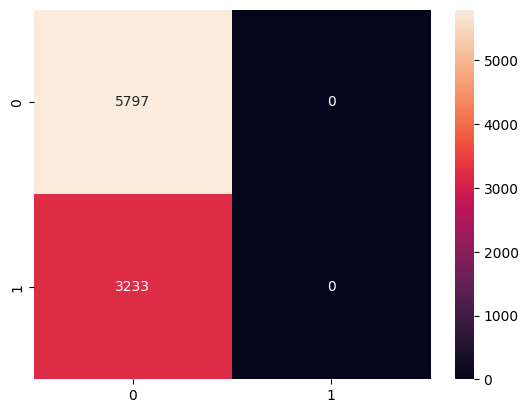

In [73]:
matrix = confusion_matrix(y_test, preds)
sns.heatmap(matrix, annot=True, fmt='d')